In [1]:
# Importamos las librerías necesarias para nuestro código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
plt.rcParams.update({'font.size': 20})

In [2]:
# Leemos el archivo "MeteoVid18" con la siguiente función para empezar a trabajar.
dfm = pd.DataFrame( pd.read_csv("MeteoVid18.csv", engine="python" ) )
#dfm.head()

In [3]:
df0 = pd.DataFrame( pd.read_csv("MeteoVid18.csv", engine="python" ) )

In [4]:
#dfm['Latitud (ºN)'] = "28º 55.117'"
#dfm['Longitud (ºO)'] = "111º 18.638'"
#dfm['Elevacion (m)'] = "101"
dfm.dtypes

Date                 object
Time                 object
batt_volt_Min       float64
logger_temp         float64
short_up_Avg        float64
short_dn_Avg        float64
long_up_Avg         float64
long_dn_Avg         float64
cnr4_T_C_Avg        float64
cnr4_T_K_Avg        float64
long_up_corr_Avg    float64
long_dn_corr_Avg    float64
Rs_net_Avg          float64
Rl_net_Avg          float64
albedo_Avg           object
Rn_Avg              float64
AirTC_Avg           float64
RH                  float64
WS_ms_S_WVT         float64
WindDir_D1_WVT      float64
WindDir_SD1_WVT     float64
Temp_C_Avg(1)       float64
Temp_C_Avg(2)       float64
Temp_C_Avg(3)       float64
Temp_C_Avg(4)        object
H. suelo 60         float64
Result2_Avg         float64
T. suelo 60 cm      float64
Result4_Avg         float64
Result5_Avg         float64
Result6_Avg         float64
Result7_Avg         float64
Result8_Avg         float64
Result9_Avg         float64
Riego               float64
dtype: object

In [5]:
#Se eliminan las columnas innecesarias para el análisis
dfm.drop( dfm.columns[19:35], axis=1, inplace=True )
dfm.drop( dfm.columns[2:14], axis=1, inplace=True )
dfm.head()

,Date,Time,albedo_Avg,Rn_Avg,AirTC_Avg,RH,WS_ms_S_WVT
0,06/01/2018,17:00:00,0.00,1.79,27.75,20.61,2.33
1,06/01/2018,17:30:00,0.00,-18.59,26.57,25.25,3.12
2,06/01/2018,18:00:00,0.00,-35.10,25.01,26.45,2.54
3,06/01/2018,18:30:00,-0.16,-40.13,23.65,29.22,2.01
4,06/01/2018,19:00:00,-0.15,-39.46,22.84,31.08,2.14


In [6]:
#Se crea una nueva columna "FECHA" a partir de las columnas "DATE" y "TIME"
dfm["Fecha"] = dfm["Date"] + " "+ dfm["Time"]
#Se eliminan las columnas "DATE" y "TIME"
dfm.drop( ["Date","Time"], axis=1, inplace=True )
dfm.head()

,albedo_Avg,Rn_Avg,AirTC_Avg,RH,WS_ms_S_WVT,Fecha
0,0.00,1.79,27.75,20.61,2.33,06/01/2018 17:00:00
1,0.00,-18.59,26.57,25.25,3.12,06/01/2018 17:30:00
2,0.00,-35.10,25.01,26.45,2.54,06/01/2018 18:00:00
3,-0.16,-40.13,23.65,29.22,2.01,06/01/2018 18:30:00
4,-0.15,-39.46,22.84,31.08,2.14,06/01/2018 19:00:00


In [7]:
dfm.rename(columns={'AirTC_Avg':'TempA'}, inplace=True)
dfm.rename(columns={'WS_ms_S_WVT':'VelWind'}, inplace=True)
dfm.rename(columns={'Rn_Avg':'Rad'}, inplace=True)
dfm.rename(columns={'albedo_Avg':'Albedo'}, inplace=True)
dfm['Albedo'] = dfm['Albedo'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
dfm.dtypes

Albedo     float64
Rad        float64
TempA      float64
RH         float64
VelWind    float64
Fecha       object
dtype: object

In [8]:
# Cambiamos TIMESTAMP a variable de tiempo.
dfm['Fecha'] = pd.to_datetime(dfm.apply(lambda x: x['Fecha'], 1), dayfirst=True)

In [9]:
# Primero creamos una columna nueva para tener los meses y días de cada año
dfm['Mes'] = dfm['Fecha'].dt.month
dfm['Año'] = dfm['Fecha'].dt.year
dfm['Día'] = dfm['Fecha'].dt.day
dfm['Hora'] = dfm ['Fecha'].dt.hour
dfm.head()

,Albedo,Rad,TempA,RH,VelWind,Fecha,Mes,Año,Día,Hora
0,0.00,1.79,27.75,20.61,2.33,2018-01-06 17:00:00,1.0,2018.0,6.0,17.0
1,0.00,-18.59,26.57,25.25,3.12,2018-01-06 17:30:00,1.0,2018.0,6.0,17.0
2,0.00,-35.10,25.01,26.45,2.54,2018-01-06 18:00:00,1.0,2018.0,6.0,18.0
3,-0.16,-40.13,23.65,29.22,2.01,2018-01-06 18:30:00,1.0,2018.0,6.0,18.0
4,-0.15,-39.46,22.84,31.08,2.14,2018-01-06 19:00:00,1.0,2018.0,6.0,19.0


In [10]:
# Agrupamos la Temperatura por Año y Mes, y así sacamos el máximo y mínimo mensuales.
dfm['VelWindmean'] = dfm.groupby(['Mes'])['VelWind'].transform('mean')

dfm['Tempmax'] = dfm.groupby(['Mes','Día'])['TempA'].transform('max')
dfm['Tempmin'] = dfm.groupby(['Mes','Día'])['TempA'].transform('min')

dfm['Tmax'] = dfm.groupby(['Mes'])['Tempmax'].transform('mean')
dfm['Tmin'] = dfm.groupby(['Mes'])['Tempmin'].transform('mean')

dfm['Tmean'] = dfm.groupby(['Mes'])['TempA'].transform('mean')

dfm["RelHmax"] =dfm.groupby(["Mes","Día"])['RH'].transform("max")
dfm["RelHmin"] = dfm.groupby(["Mes","Día"])['RH'].transform("min")

dfm['RHmax'] = dfm.groupby(['Mes'])['RelHmax'].transform('mean')
dfm['RHmin'] = dfm.groupby(['Mes'])['RelHmin'].transform('mean')

dfm['RHmean'] = dfm.groupby(['Mes'])['RH'].transform('mean')

dfm['RadNet'] = dfm.groupby(['Mes'])['Rad'].transform('mean')
dfm['Albedo'] = dfm.groupby(['Mes'])['Albedo'].transform('mean')
dfm["Mes"]=dfm.Mes
dfm["Año"]=dfm.Año
dfm['Día']=dfm.Día
dfm['Hora']=dfm.Hora
dfm.head()

,Albedo,Rad,TempA,RH,VelWind,Fecha,Mes,Año,Día,Hora,...,Tempmin,Tmax,Tmin,Tmean,RelHmax,RelHmin,RHmax,RHmin,RHmean,RadNet
0,-0.423822,1.79,27.75,20.61,2.33,2018-01-06 17:00:00,1.0,2018.0,6.0,17.0,...,16.03,27.34121,7.501276,16.963975,46.27,20.61,66.380848,14.056733,38.471432,34.734815
1,-0.423822,-18.59,26.57,25.25,3.12,2018-01-06 17:30:00,1.0,2018.0,6.0,17.0,...,16.03,27.34121,7.501276,16.963975,46.27,20.61,66.380848,14.056733,38.471432,34.734815
2,-0.423822,-35.10,25.01,26.45,2.54,2018-01-06 18:00:00,1.0,2018.0,6.0,18.0,...,16.03,27.34121,7.501276,16.963975,46.27,20.61,66.380848,14.056733,38.471432,34.734815
3,-0.423822,-40.13,23.65,29.22,2.01,2018-01-06 18:30:00,1.0,2018.0,6.0,18.0,...,16.03,27.34121,7.501276,16.963975,46.27,20.61,66.380848,14.056733,38.471432,34.734815
4,-0.423822,-39.46,22.84,31.08,2.14,2018-01-06 19:00:00,1.0,2018.0,6.0,19.0,...,16.03,27.34121,7.501276,16.963975,46.27,20.61,66.380848,14.056733,38.471432,34.734815


In [11]:
# df = pd.DataFrame([])
df = dfm.drop_duplicates(dfm.columns[dfm.columns.isin(['Mes'])])
df.head()

,Albedo,Rad,TempA,RH,VelWind,Fecha,Mes,Año,Día,Hora,...,Tempmin,Tmax,Tmin,Tmean,RelHmax,RelHmin,RHmax,RHmin,RHmean,RadNet
0,-0.423822,1.79,27.75,20.61,2.33,2018-01-06 17:00:00,1.0,2018.0,6.0,17.0,...,16.03,27.341210,7.501276,16.963975,46.27,20.61,66.380848,14.056733,38.471432,34.734815
1214,-0.479545,-58.85,12.15,51.79,2.18,2018-02-01 00:00:00,2.0,2018.0,1.0,0.0,...,10.06,25.320357,9.433214,17.230275,52.18,20.93,72.542857,25.725357,48.168006,56.250350
2558,-0.409137,-67.72,9.88,61.63,1.44,2018-03-01 00:00:00,3.0,2018.0,1.0,0.0,...,6.93,29.519355,8.883548,19.282359,73.51,11.99,68.361613,15.204839,36.968353,92.894913
4046,-0.386088,-60.21,13.00,53.70,1.11,2018-04-01 00:00:00,4.0,2018.0,1.0,0.0,...,11.42,32.671667,10.781667,21.880618,66.39,12.47,76.585000,15.712333,40.785667,134.012965
5486,-0.367835,-74.48,16.45,64.43,1.62,2018-05-01 00:00:00,5.0,2018.0,1.0,0.0,...,13.03,34.133548,12.781290,23.650034,76.59,31.71,79.971935,17.229032,44.233468,162.405343


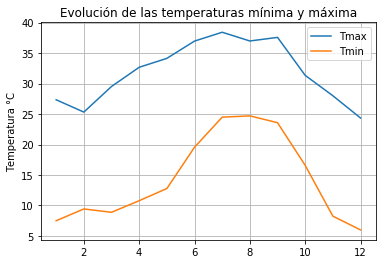

In [12]:
plt.plot(df.Mes, df.Tmax)
plt.plot(df.Mes, df.Tmin)
plt.title("Evolución de las temperaturas mínima y máxima")
plt.ylabel("Temperatura °C")
plt.gca().legend(('Tmax','Tmin'))
plt.grid(True)
plt.show()

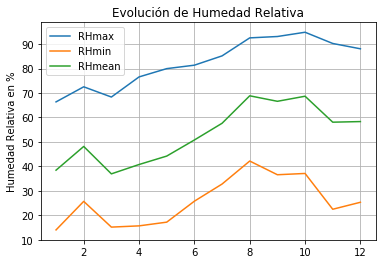

In [13]:
plt.plot(df.Mes, df.RHmax)
plt.plot(df.Mes, df.RHmin)
plt.plot(df.Mes, df.RHmean)
plt.title("Evolución de Humedad Relativa")
plt.ylabel("Humedad Relativa en %")
plt.gca().legend(('RHmax','RHmin', "RHmean"))
plt.grid(True)
plt.show()

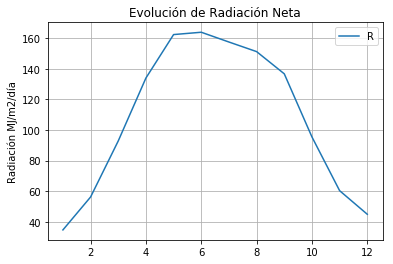

In [14]:
plt.plot(df.Mes, df.RadNet)
plt.title("Evolución de Radiación Neta")
plt.ylabel("Radiación MJ/m2/día")
plt.gca().legend(('Rad'))
plt.grid(True)
plt.show()

In [15]:
df = df.drop(dfm.index[17247])

In [16]:
df = df.reset_index(drop=True)
df

,Albedo,Rad,TempA,RH,VelWind,Fecha,Mes,Año,Día,Hora,...,Tempmin,Tmax,Tmin,Tmean,RelHmax,RelHmin,RHmax,RHmin,RHmean,RadNet
0,-0.423822,1.79,27.75,20.61,2.33,2018-01-06 17:00:00,1.0,2018.0,6.0,17.0,...,16.03,27.341210,7.501276,16.963975,46.27,20.61,66.380848,14.056733,38.471432,34.734815
1,-0.479545,-58.85,12.15,51.79,2.18,2018-02-01 00:00:00,2.0,2018.0,1.0,0.0,...,10.06,25.320357,9.433214,17.230275,52.18,20.93,72.542857,25.725357,48.168006,56.250350
2,-0.409137,-67.72,9.88,61.63,1.44,2018-03-01 00:00:00,3.0,2018.0,1.0,0.0,...,6.93,29.519355,8.883548,19.282359,73.51,11.99,68.361613,15.204839,36.968353,92.894913
3,-0.386088,-60.21,13.00,53.70,1.11,2018-04-01 00:00:00,4.0,2018.0,1.0,0.0,...,11.42,32.671667,10.781667,21.880618,66.39,12.47,76.585000,15.712333,40.785667,134.012965
4,-0.367835,-74.48,16.45,64.43,1.62,2018-05-01 00:00:00,5.0,2018.0,1.0,0.0,...,13.03,34.133548,12.781290,23.650034,76.59,31.71,79.971935,17.229032,44.233468,162.405343
5,-0.381934,-48.49,18.98,54.48,1.58,2018-06-01 00:00:00,6.0,2018.0,1.0,0.0,...,14.08,36.968333,19.552667,28.416187,80.84,7.91,81.381333,25.799667,50.810507,163.926069
6,-0.189610,-53.37,21.22,81.30,0.43,2018-07-01 00:00:00,7.0,2018.0,1.0,0.0,...,18.71,38.419355,24.488387,31.065726,89.83,14.97,85.183226,32.805806,57.639805,157.534402
7,-0.381667,-34.15,27.14,81.63,0.40,2018-08-01 00:00:00,8.0,2018.0,1.0,0.0,...,24.93,36.985806,24.702581,30.120894,88.60,33.42,92.539677,42.205484,68.868454,151.273589
8,-0.486379,-33.48,27.61,84.23,1.02,2018-09-01 00:00:00,9.0,2018.0,1.0,0.0,...,25.94,37.576000,23.582333,29.661271,88.90,39.65,93.100000,36.606333,66.619750,136.749910
9,-0.614787,-18.32,26.75,82.20,0.77,2018-10-01 00:00:00,10.0,2018.0,1.0,0.0,...,24.34,31.346452,16.581613,23.254207,96.55,45.74,94.842581,37.131613,68.696082,95.513468


In [17]:
df = df.apply(pd.to_numeric, errors='coerce')
df0 = df0.apply(pd.to_numeric, errors='coerce')
dfm = dfm.apply(pd.to_numeric, errors='coerce')
# df['Mes'] = df.Mes
dfm.dtypes

Albedo         float64
Rad            float64
TempA          float64
RH             float64
VelWind        float64
Fecha            int64
Mes            float64
Año            float64
Día            float64
Hora           float64
VelWindmean    float64
Tempmax        float64
Tempmin        float64
Tmax           float64
Tmin           float64
Tmean          float64
RelHmax        float64
RelHmin        float64
RHmax          float64
RHmin          float64
RHmean         float64
RadNet         float64
dtype: object

In [18]:
df = df.drop(["RelHmin", "RelHmax", "Tempmin", 'Tempmax','VelWind','TempA','Rad'], axis=1)
df

,Albedo,RH,Fecha,Mes,Año,Día,Hora,VelWindmean,Tmax,Tmin,Tmean,RHmax,RHmin,RHmean,RadNet
0,-0.423822,20.61,1515258000000000000,1.0,2018.0,6.0,17.0,1.943827,27.341210,7.501276,16.963975,66.380848,14.056733,38.471432,34.734815
1,-0.479545,51.79,1517443200000000000,2.0,2018.0,1.0,0.0,1.964189,25.320357,9.433214,17.230275,72.542857,25.725357,48.168006,56.250350
2,-0.409137,61.63,1519862400000000000,3.0,2018.0,1.0,0.0,1.926196,29.519355,8.883548,19.282359,68.361613,15.204839,36.968353,92.894913
3,-0.386088,53.70,1522540800000000000,4.0,2018.0,1.0,0.0,2.101812,32.671667,10.781667,21.880618,76.585000,15.712333,40.785667,134.012965
4,-0.367835,64.43,1525132800000000000,5.0,2018.0,1.0,0.0,2.113918,34.133548,12.781290,23.650034,79.971935,17.229032,44.233468,162.405343
5,-0.381934,54.48,1527811200000000000,6.0,2018.0,1.0,0.0,2.154986,36.968333,19.552667,28.416187,81.381333,25.799667,50.810507,163.926069
6,-0.189610,81.30,1530403200000000000,7.0,2018.0,1.0,0.0,2.022204,38.419355,24.488387,31.065726,85.183226,32.805806,57.639805,157.534402
7,-0.381667,81.63,1533081600000000000,8.0,2018.0,1.0,0.0,1.910853,36.985806,24.702581,30.120894,92.539677,42.205484,68.868454,151.273589
8,-0.486379,84.23,1535760000000000000,9.0,2018.0,1.0,0.0,1.790326,37.576000,23.582333,29.661271,93.100000,36.606333,66.619750,136.749910
9,-0.614787,82.20,1538352000000000000,10.0,2018.0,1.0,0.0,1.664435,31.346452,16.581613,23.254207,94.842581,37.131613,68.696082,95.513468


In [19]:
# Ec 7, Jansen & Haise (1963)
ETo1 = []
for i in range (0,len(df)):
    ETo1.append((0.0252*df['Tmean'][i] + 0.078)*df['RadNet'][i])

In [20]:
# Ec. 31, Valiantzas 1 (2012)
phi = (math.pi/180)*28.94917
ETo2 = []
for i in range (0,len(df)):
    ETo2.append(0.0393*df['RadNet'][i]*(df['Tmean'][i] + 9.5)**0.5 - 0.19*(df['RadNet'][i]**0.6)*(phi**0.15) + 0.0061*(df['Tmean'][i] + 20)*(1.12*df['Tmean'][i] - df['Tmin'][i] - 2)**0.7)

In [21]:
# Ec. 32,  Valiantzas 4 (2013):

# Para esto, debemos obtener primero la Radiación.
dr = []
delta = []
omega = []

for m in range (0,len(df)):
    alpha = df['Albedo'][i]
    j = int(30.4*m - 15)
    dr.append(1 + 0.033*math.cos(((2*math.pi)/365)*j))
    delta.append(0.409*math.sin(((2*math.pi)/365)*j - 1.39))
    omega.append(math.acos(-math.tan(phi)*math.tan(0.409*math.sin(((2*math.pi)/365)*j - 1.39))))

In [22]:
dfc = pd.DataFrame()
dfc['dr'] = dr
dfc['delta'] = delta
dfc['omega'] = omega
dfc = dfc.apply(pd.to_numeric, errors='coerce')

phi = (math.pi/180)*28.94917

dfc.head()

,dr,delta,omega
0,1.031906,-0.407775,1.329507
1,1.031906,-0.370216,1.354428
2,1.023584,-0.236097,1.437322
3,1.008564,-0.033386,1.552321
4,0.991711,0.172248,1.667178


In [23]:
# Calculamos la Radiación solar por mes:
Ra = []
for i in range (0,len(df)):
    Ra.append(((24*60)/math.pi)*0.0820*(dfc['omega'][i]*math.sin(phi)*math.sin(dfc['delta'][i]) + math.cos(phi)*math.cos(dfc['delta'][i])*math.sin(dfc['omega'][i])))

In [24]:
# Convertimos el arreglo de Radiacion solar.
dfc['Ra'] = Ra
dfc['Ra'] = dfc['Ra'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [25]:
# Calculamos la ecuación Valiantzas 4 (2013)
ETo3 = [] 
for i in range (0,len(df)):
    ETo3.append(0.051*(1 - df['Albedo'][i])*df['RadNet'][i]*(df['Tmean'][i] + 9.5)**0.5 - 2.4*(df['RadNet'][i]/dfc['Ra'][i])**2 + 0.048*(df['Tmean'][i] + 20)*(1 - df['RHmean'][i]/100)*(0.5 + 0.536*df['VelWindmean'][i]) + 0.00012*101)

In [26]:
# Creamos un dataframe con los ETo
ETo = {'Janses & Haise': ETo1, 'Valiantzas 1': ETo2, 'Valiantzas 4':ETo3}
ETo = pd.DataFrame(data=ETo)
ETo

,Janses & Haise,Valiantzas 1,Valiantzas 4
0,17.558177,6.671233,7.229301
1,28.811594,10.466691,6.225899
2,52.384876,18.245723,5.988913
3,84.346631,27.694330,12.721210
4,109.458090,34.602070,22.018419
5,130.171712,37.521038,34.816797
6,135.614481,37.232478,29.379138
7,126.623032,35.134399,36.723789
8,112.882131,31.609232,36.355425
9,63.421517,19.915900,26.914278


In [27]:
# Parte 3

In [28]:
# Leemos el archivo "FlujosVid18.csv" con la siguiente función para empezar a trabajar.
dff = pd.DataFrame( pd.read_csv("FlujosVid18.csv",  engine="python" ) )

In [29]:
dff.head(10)

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,Tsoil_fmeth,Tsoil_fwin,PotRad,FP_NEEnight,FP_Temp,E_0,R_ref,Reco,GPP_f,GPP_fqc
0,--,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,...,-,days,W_m-2,umolm-2s-1,degC,degK,umolm-2s-1,umolm-2s-1,umolm-2s-1,-
1,2018,7,0.5,2.56,11.52,-20.04,-0.87,16.51,20.99,43.83,...,-9999,-9999,0,-9999,16.51,207.66,0.92767,1.00713,-1.0729,1
2,2018,7,1,4.07,15.11,-7.34,-0.97,16.61,21.05,46.82,...,-9999,-9999,0,-9999,16.61,207.66,0.92767,1.01249,-9.62E-01,1
3,2018,7,1.5,0.92,8.61,-9.76,-0.96,16.07,21.09,46.65,...,-9999,-9999,0,-9999,16.07,207.66,0.92767,0.98371,-1.1643,1
4,2018,7,2,0.41,1.93,-8.55,-2.06,16.06,21.09,46.27,...,-9999,-9999,0,-9999,16.06,207.66,0.92767,0.98318,-1.1648,1
5,2018,7,2.5,0.31,6.4,-0.55,-1.32,15.81,21.1,47.76,...,-9999,-9999,0,-9999,15.81,207.66,0.92767,0.96997,-1.4929,1
6,2018,7,3,0.68,2.44,-2.92,-1.22,15.03,21.1,48.66,...,-9999,-9999,0,-9999,15.03,207.66,0.92767,0.92923,-5.48E-01,1
7,2018,7,3.5,0.36,2.4,-2.61,-1.14,14.7,21.1,49.62,...,-9999,-9999,0,-9999,14.7,207.66,0.92767,0.91221,-2.85E-01,1
8,2018,7,4,0.1,2.49,-1.29,-1.74,14.42,21.1,49.73,...,-9999,-9999,0,-9999,14.42,207.66,0.92767,0.89787,2.68E-01,1
9,2018,7,4.5,0.96,5.8,-8.07,-1.24,14.76,21.1,48,...,-9999,-9999,0,-9999,14.76,207.66,0.92767,0.91529,-2.27E-01,1


In [30]:
dff1=pd.DataFrame([])

dff1["Rad"] = dff["Rg_f"]
dff1["CalorL"] = dff["LE_f"]
dff1["CalorS"] = dff["H_f"]
dff1["Hora"] = dff["Hour"]
dff1["Dia"] = dff["DoY"]
dff1["Año"] = dff["Year"]

In [31]:
dff1 = dff1.drop([0], axis=0)

In [32]:
dff1 = dff1.apply(pd.to_numeric, errors='coerce')
dff1 = dff1.reset_index(drop=True)
dff1.head()

,Rad,CalorL,CalorS,Hora,Dia,Año
0,-0.87,11.52,-20.04,0.5,7,2018
1,-0.97,15.11,-7.34,1.0,7,2018
2,-0.96,8.61,-9.76,1.5,7,2018
3,-2.06,1.93,-8.55,2.0,7,2018
4,-1.32,6.40,-0.55,2.5,7,2018


In [33]:
dff2=pd.DataFrame([])

rad=[]
cl=[]
cs=[]
dia=[]
año=[]
hora=[]
# print(len(dff1))
for i in range (0,len(dff1)):
    if dff1.Dia[i]<32:
        rad.append(dff1.Rad[i])
        cl.append(dff1.CalorL[i])
        cs.append(dff1.CalorS[i])
        año.append(dff1.Año[i])
        hora.append(dff1.Hora[i])
        dia.append(dff1.Dia[i])
        
dff2["Rad"] = rad
dff2["CalorL"] = cl
dff2["CalorS"] = cs
dff2["Hora"] = hora

In [34]:
dff2.head()

,Rad,CalorL,CalorS,Hora
0,-0.87,11.52,-20.04,0.5
1,-0.97,15.11,-7.34,1.0
2,-0.96,8.61,-9.76,1.5
3,-2.06,1.93,-8.55,2.0
4,-1.32,6.40,-0.55,2.5


In [35]:
dff2["Rad"] = dff1.groupby(["Hora"])["Rad"].transform("mean")
dff2["CalorL"] = dff1.groupby(["Hora"])["CalorL"].transform("mean")
dff2["CalorS"] = dff1.groupby(["Hora"])["CalorS"].transform("mean")

In [36]:
dff2 = dff2.drop_duplicates()
dff2.head()

,Rad,CalorL,CalorS,Hora
0,-1.676295,4.328268,-7.451123,0.5
1,-1.673203,3.148412,-6.646295,1.0
2,-1.621616,4.676462,-7.123287,1.5
3,-1.576880,4.483637,-7.540920,2.0
4,-1.571114,4.491677,-7.876099,2.5


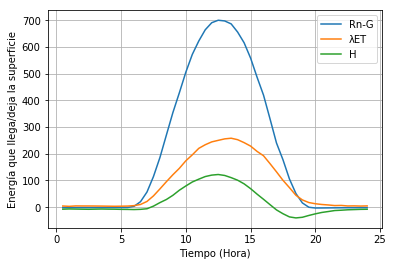

In [37]:
plt.plot(dff2.Hora, dff2.Rad)
plt.plot(dff2.Hora, dff2.CalorL)
plt.plot(dff2.Hora, dff2.CalorS)

plt.ylabel("Energía que llega/deja la superficie")
plt.xlabel("Tiempo (Hora)")
plt.gca().legend(('Rn-G','λET',"H"))
plt.grid(True)
plt.show()